In [1]:
import requests
import time
import re
from bs4 import BeautifulSoup
from bs4 import UnicodeDammit
import http.cookiejar
import os 
import sys
import ijson
import io
from bson.code import Code
import json
import string
from datetime import datetime
from nltk.corpus import stopwords
from datetime import datetime
import re 
import matplotlib.pyplot as plt
from textblob import TextBlob
from datetime import datetime
import re 
import pandas as pd
from pandas import DataFrame
import random
import numpy as np

## Parse and get the content of the news from the directory 

In [2]:
#a typical leftover thing : [<time class="timestamp__date" datetime="">Feb 13, 2020 7:47AM EST</time>]

In [3]:
paragraph_list=[]
date_list=[]
directory = os.getcwd() #get the directory
for filename in os.listdir(directory):
    paragraph=""
    if filename.endswith('.htm') == False:
        continue
    try:
        with open(os.path.join(directory, filename), 'r',encoding="utf-8") as file:
            text = file.read()
            soup = BeautifulSoup(text, 'html.parser') 
            #print(soup)
            #get paragraph
            paragraphs = soup.findAll('p') 
        if not paragraphs:
            paragraph=None
        else:
            #print(filename)
            try:
                datestr=soup.select('time[datetime]')[0]['datetime']
                #datestamp
                clean_date=datestr[0:datestr.rfind('-')] #strip out the clean date time
                datetime_object = datetime.strptime(clean_date, '%Y-%m-%dT%H:%M:%S')
                date_list.append(datetime_object.date()) # get only the date
                #print(datetime_object.date())
                for el in paragraphs[1:]: #first <p> label is meaningless
                    if el.text=="The views and opinions expressed herein are the views and opinions of the author and do not necessarily reflect those of Nasdaq, Inc.":
                        break
                    paragraph=paragraph+el.text
                    #print(el.text) 
                paragraph_list.append(paragraph)
            except:
                #Some news doesn't have value for datetime tag 
                datestr=""
               
    except:
        print("file "+filename,sys.exc_info()[0])

In [4]:
##There are 814 html file but some are skipped bcs they don't have datetime stamp 
##To see if paragraph and date has the same number of items
print('There are ',len(paragraph_list),'paragraphs and',len(date_list),'date stamps')

There are  806 paragraphs and 806 date stamps


In [5]:
sums=[]
date_sentim_pair=dict()
for pa in paragraph_list:
    sum=0
    blob=TextBlob(pa)
    for sentence in blob.sentences:
        sentim=sentence.sentiment.polarity
        sum=sum+sentim
    i=paragraph_list.index(pa)
    sentim_avg=sum/len(blob.sentences)
    print(date_list[i])
    print(sentim_avg)
    #average sentiment 
    date_sentim_pair[date_list[i]]=sentim_avg

2019-10-07
0.1498438056978621
2019-12-29
-0.02905844155844156
2019-10-23
0.02952482375462172
2020-02-06
0.201583167989418
2020-02-20
0.021428571428571432
2019-11-22
0.2023306477473144
2020-02-21
0.31813124375624374
2020-02-06
-0.05962962962962962
2019-10-02
0.04348169191919192
2019-10-23
0.02638037117203784
2019-10-24
0.08117283950617284
2019-11-21
0.05916666666666667
2019-10-24
0.05494447021232735
2019-10-03
-0.11574074074074076
2019-11-05
0.11325757575757577
2020-01-30
0.2825
2019-11-26
0.09165896804483761
2019-12-27
0.05652830387205388
2020-02-04
-0.019722222222222224
2020-01-08
0.18427272727272728
2020-02-03
0.039679487179487175
2020-02-10
0.26792478354978355
2019-11-22
0.10991961279461278
2020-01-17
0.18622804232804238
2020-02-07
-0.01636679292929293
2020-01-30
0.05105863833136559
2020-02-25
0.10920138625182484
2020-01-31
0.19494017556517557
2020-02-02
0.26666666666666666
2019-10-14
0.051112125721500715
2019-10-04
0.005402146464646462
2020-02-09
0.14932414204153333
2019-11-04
-0.0

2020-03-02
0.1773809523809524
2020-01-06
0.09217402196568864
2020-03-06
0.005648148148148152
2020-03-04
0.23308175505050505
2019-12-14
0.26076556885380403
2020-02-06
0.2007108350586611
2019-10-07
0.08007248827561328
2020-02-19
0.009645061728395068
2019-10-25
-0.06944444444444443
2019-10-10
0.013371933621933623
2020-02-20
0.024050671550671553
2020-01-22
0.052291005291005284
2019-10-23
-0.019047619047619046
2020-02-18
0.009645061728395068
2019-10-25
0.2558934486328966
2020-01-14
0.10945797258297259
2019-11-06
0.10695346320346322
2019-12-10
0.18604615394137453
2019-11-22
0.11297420634920634
2019-11-08
0.11454313543599257
2019-10-01
0.23032845461416887
2020-02-13
0.2458814333814334
2020-03-03
0.08887362637362638
2019-11-25
0.03784090909090909
2019-11-11
0.009645061728395068
2020-02-05
0.16413520837627985
2019-12-23
0.009645061728395068
2019-10-04
0.013751493428912779
2019-11-26
0.0861555034471701
2019-10-24
0.1830935846560847
2019-12-20
0.09586842105263157
2020-01-17
0.2274522685757805
201

2019-11-26
0.12418128654970759
2019-12-04
0.2795400432900433
2019-10-24
0.1456595719095719
2019-10-23
0.14292929292929293
2020-02-05
0.24307142857142858
2019-11-27
0.18730459355459358
2020-02-07
-0.021134626690182252
2020-02-27
-0.0936152162014231
2019-10-29
0.04364765935367787
2019-12-06
0.049999999999999996
2019-12-26
0.09091880341880343
2019-11-21
0.11450216450216451
2019-11-25
0.048711755233494365
2020-01-08
0.2203282828282828
2019-10-29
0.06333333333333334
2019-10-22
0.042449419793169796
2020-02-18
0.23382936507936508
2020-01-03
0.12212878787878786
2019-12-12
0.16342592592592595
2019-12-30
0.1287037037037037
2020-02-13
0.0561938431938432
2020-02-18
-0.02292618784057141
2020-01-17
0.125
2020-01-21
-0.04067085953878407
2019-11-08
0.06692132969910748
2020-02-04
0.057446145124716554
2019-10-23
0.08125448738253617
2020-02-05
0.24307142857142858
2020-01-22
0.06731078904991948
2020-01-21
0.06255555555555554
2019-11-22
0.11063581079814844
2019-12-30
-0.015113285634118975
2019-12-12
0.0804

In [6]:
date_parag_pair=dict()
for pa in paragraph_list:
    i=paragraph_list.index(pa)
    date_parag_pair[date_list[i]]=pa
#print(random.choice(list(date_parag_pair.items())))
print(random.sample(date_parag_pair.items(),1)) #choose a random sample to check

[(datetime.date(2019, 12, 19), 'Shares of electric automaker Tesla (TSLA) have been on a tear lately, more than doubling since June lows and adding 17% in December alone. A lot of things seem to be falling into place for the company and short-sellers have been covering their positions, pushing the shares to new all-time highs.Currently, the CBOE Volatility Index is trading right around its multi-year average of 12-13%. Implied volatilities tend to fall as stocks rise.It’s another story in Tesla options, however. At-the-money calls and puts that expire in February – after the company’s next quarterly report – currently trade at over 45% implied volatility.Buying options at that kind of volatility is a risky proposition. They have so much time decay that if you don’t experience the move you’re expecting quickly, you’ll lose a lot of money.So for someone who has been long shares of Tesla and now has solid gains on the books, what’s the next move? Selling means locking in those profits, bu

## Plots

In [7]:
###sentiment plot 
sentim=pd.DataFrame(date_sentim_pair.items())
sentim.columns={"Date","Sentiment"}
sentim=sentim.sort_values(by=['Date'])
#sentim=sentim.set_index('Date')
sentim.head()

,Sentiment,Date
32,2020-02-26,-0.108030
75,2019-11-24,-0.087500
81,2019-10-17,-0.034333
46,2019-12-26,-0.034000
41,2020-01-13,-0.033788


C:\Users\49224\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


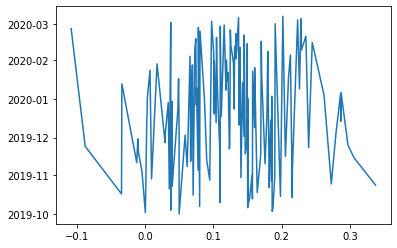

In [8]:
plt.plot("Date","Sentiment",data=sentim)

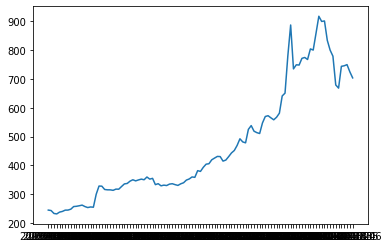

In [9]:
###stock price plot 
price=pd.read_csv('TSLA.csv')
price_date=price['Date']
price_close=price['Close']
#price['price_close_pct']=price.pct_change()['Close'] #price change 
plt.plot('Date','Close',data=price)
plt.show()

### Merging news & twiter sentiment with plot 

In [10]:
sentim.Date= pd.to_datetime(sentim.Date)
price.Date = pd.to_datetime(price.Date)
##merge news sentiment with price 
date_sentim_price = pd.merge(sentim,
                 price,
                 on='Date',how='right')
date_sentim_price=date_sentim_price.sort_values('Date')
date_sentim_price=date_sentim_price.fillna(0) #fillna so that all the days with price has sentim
date_sentim_price.head()

,Sentiment,Date,Open,High,Low,Close,Adj Close,Volume
0,0,2019-10-01,241.500000,245.949997,239.130005,244.690002,244.690002,6162600
1,0,2019-10-02,243.289993,244.649994,239.429993,243.130005,243.130005,5631400
2,0,2019-10-03,231.860001,234.479996,224.279999,233.029999,233.029999,15084500
3,0,2019-10-04,231.610001,234.779999,228.070007,231.429993,231.429993,7995000
4,0,2019-10-07,229.800003,238.559998,228.550003,237.720001,237.720001,8064200


In [11]:
twit=pd.read_csv('tweets_sentim_avg.csv')
twit.head()

,date,retweet_count,sum_sentiment,sum_length,avg_sentiment,num_tweets
0,10/14/19,55,-0.31272,5526,-0.00763,41
1,10/15/19,1,0.52024,2025,0.04002,13
2,10/16/19,5,0.55625,987,0.13906,4
3,10/17/19,4,0.43636,648,0.07273,6
4,10/18/19,0,0.37879,231,0.37879,1


In [12]:
twit=pd.read_csv('tweets_sentim_avg.csv')
twit_sentim=pd.DataFrame(twit[['date','retweet_count','num_tweets','avg_sentiment']])
twit_sentim.rename(columns={'date':"Date","avg_sentiment":"Twit_sentim_avg"},inplace=True)
twit_sentim.head()

,Date,retweet_count,num_tweets,Twit_sentim_avg
0,10/14/19,55,41,-0.00763
1,10/15/19,1,13,0.04002
2,10/16/19,5,4,0.13906
3,10/17/19,4,6,0.07273
4,10/18/19,0,1,0.37879


In [13]:
twit_sentim.Date= pd.to_datetime(twit_sentim.Date)
##merge twit sentiment with news sentiment and  price 
date_2sentim_price = pd.merge(date_sentim_price,
                 twit_sentim,
                 on='Date',how='left')
date_2sentim_price=date_2sentim_price.sort_values('Date') #sort date 
date_2sentim_price.rename(columns={'Sentiment':'News_Sentim_avg'},inplace=True)
#date_2sentim_price[date_2sentim_price.isna().any(axis=1)] # to see about null values 
date_2sentim_price=date_2sentim_price.fillna(0)
#date_2sentim_price.head()

In [14]:
date_2sentim_price['Sentiment_newstwit']=date_2sentim_price['News_Sentim_avg']+date_2sentim_price['Twit_sentim_avg']
date_2sentim_price.head()

,News_Sentim_avg,Date,Open,High,Low,Close,Adj Close,Volume,retweet_count,num_tweets,Twit_sentim_avg,Sentiment_newstwit
0,0,2019-10-01,241.500000,245.949997,239.130005,244.690002,244.690002,6162600,0.0,0.0,0.0,0.0
1,0,2019-10-02,243.289993,244.649994,239.429993,243.130005,243.130005,5631400,0.0,0.0,0.0,0.0
2,0,2019-10-03,231.860001,234.479996,224.279999,233.029999,233.029999,15084500,0.0,0.0,0.0,0.0
3,0,2019-10-04,231.610001,234.779999,228.070007,231.429993,231.429993,7995000,0.0,0.0,0.0,0.0
4,0,2019-10-07,229.800003,238.559998,228.550003,237.720001,237.720001,8064200,0.0,0.0,0.0,0.0


In [15]:
#Count proportion of positive news and negative news 

print("Percentage of positive news:",round(date_2sentim_price[date_2sentim_price.News_Sentim_avg>0].count()['Date']/len(date_2sentim_price)*100,2),'%')
print("Percentage of negative news:",round(date_2sentim_price[date_2sentim_price.News_Sentim_avg<0].count()['Date']/len(date_2sentim_price)*100,2),'%')
print("Percentage of neutral news or no news:",round(date_2sentim_price[date_2sentim_price.News_Sentim_avg==0].count()['Date']/len(date_2sentim_price)*100,2),'%')

Percentage of positive news: 0.0 %
Percentage of negative news: 0.0 %
Percentage of neutral news or no news: 100.0 %


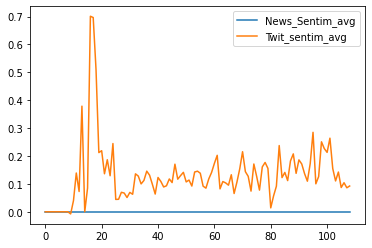

In [16]:
#plot of two sentiment 
plt.plot("News_Sentim_avg",data=date_2sentim_price)
plt.plot("Twit_sentim_avg",data=date_2sentim_price)
plt.legend()
plt.show()

In [17]:
len(date_2sentim_price)

109

In [18]:
len(date_2sentim_price['Sentiment_newstwit'])

109

## Correlation inspection 

In [19]:
#news sentiment vs. close price 
np.corrcoef(date_2sentim_price['Close'],date_2sentim_price['Twit_sentim_avg'])

array([[1.        , 0.14507163],
       [0.14507163, 1.        ]])

In [20]:
#news+twit sentiment vs close price 
np.corrcoef(date_2sentim_price['Close'],date_2sentim_price['Sentiment_newstwit'])

array([[1.        , 0.14507163],
       [0.14507163, 1.        ]])

In [21]:
#news+twit sentiment vs close price 
np.corrcoef(date_2sentim_price['Close'],date_2sentim_price['News_Sentim_avg'])


C:\Users\49224\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Users\49224\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


array([[ 1., nan],
       [nan, nan]])

In [22]:
date_2sentim_price.corr()

,News_Sentim_avg,Open,High,Low,Close,Adj Close,Volume,retweet_count,num_tweets,Twit_sentim_avg,Sentiment_newstwit
News_Sentim_avg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Open,NaN,1.000000,0.996827,0.997089,0.994667,0.994667,0.589627,-0.056653,0.337616,0.143470,0.143470
High,NaN,0.996827,1.000000,0.995628,0.997684,0.997684,0.627475,-0.057452,0.333794,0.145662,0.145662
Low,NaN,0.997089,0.995628,1.000000,0.997645,0.997645,0.571774,-0.054283,0.342378,0.143555,0.143555
Close,NaN,0.994667,0.997684,0.997645,1.000000,1.000000,0.604209,-0.057493,0.337891,0.145072,0.145072
Adj Close,NaN,0.994667,0.997684,0.997645,1.000000,1.000000,0.604209,-0.057493,0.337891,0.145072,0.145072
Volume,NaN,0.589627,0.627475,0.571774,0.604209,0.604209,1.000000,-0.078323,0.183220,0.227263,0.227263
retweet_count,NaN,-0.056653,-0.057452,-0.054283,-0.057493,-0.057493,-0.078323,1.000000,0.168767,-0.025978,-0.025978
num_tweets,NaN,0.337616,0.333794,0.342378,0.337891,0.337891,0.183220,0.168767,1.000000,0.015846,0.015846
Twit_sentim_avg,NaN,0.143470,0.145662,0.143555,0.145072,0.145072,0.227263,-0.025978,0.015846,1.000000,1.000000


### Regression sentiment vs lag1 price 

In [32]:
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

In [24]:
#function for y
def pct_label(x):
    if x<=-0.15:
        return 0
    elif x >-0.15 and x<=-0.05:
        return 1
    elif x>-0.05 and x<0:
        return 2
    elif x==0:
        return 3
    elif x>0.05 and x<=0.15:
        return 4
    elif x>0.15:
        return 5
    else:
        return 0 
#, -15 to -5, -5 to 0, 0 to 5, 5 to 15, >15+

In [25]:
date_2sentim_price.head(1)

,News_Sentim_avg,Date,Open,High,Low,Close,Adj Close,Volume,retweet_count,num_tweets,Twit_sentim_avg,Sentiment_newstwit
0,0,2019-10-01,241.5,245.949997,239.130005,244.690002,244.690002,6162600,0.0,0.0,0.0,0.0


In [26]:
#Prepare data 
regres_data=date_2sentim_price.drop(["Open","High","Low","Volume"],axis=1)
regres_data.head()

,News_Sentim_avg,Date,Close,Adj Close,retweet_count,num_tweets,Twit_sentim_avg,Sentiment_newstwit
0,0,2019-10-01,244.690002,244.690002,0.0,0.0,0.0,0.0
1,0,2019-10-02,243.130005,243.130005,0.0,0.0,0.0,0.0
2,0,2019-10-03,233.029999,233.029999,0.0,0.0,0.0,0.0
3,0,2019-10-04,231.429993,231.429993,0.0,0.0,0.0,0.0
4,0,2019-10-07,237.720001,237.720001,0.0,0.0,0.0,0.0


In [27]:
regres_data['Diff_pct']=regres_data['Close'].diff(-1)/regres_data['Close']
regres_data.head()

,News_Sentim_avg,Date,Close,Adj Close,retweet_count,num_tweets,Twit_sentim_avg,Sentiment_newstwit,Diff_pct
0,0,2019-10-01,244.690002,244.690002,0.0,0.0,0.0,0.0,0.006375
1,0,2019-10-02,243.130005,243.130005,0.0,0.0,0.0,0.0,0.041542
2,0,2019-10-03,233.029999,233.029999,0.0,0.0,0.0,0.0,0.006866
3,0,2019-10-04,231.429993,231.429993,0.0,0.0,0.0,0.0,-0.027179
4,0,2019-10-07,237.720001,237.720001,0.0,0.0,0.0,0.0,-0.009801


In [28]:
#use diff 
regres_data['Diff_pct_lag1']=regres_data['Diff_pct'].shift(-1)
# regres_data['Price_lag2']=regres_data['Diff'].shift(-2)
# regres_data['Price_lag3']=regres_data['Diff'].shift(-3)
# regres_data['Price_lag4']=regres_data['Diff'].shift(-4)
# regres_data['Price_lag5']=regres_data['Diff'].shift(-5)
# regres_data['Price_lag6']=regres_data['Diff'].shift(-6)
# regres_data['Price_lag7']=regres_data['Close'].shift(-7)
regres_data.dropna(inplace=True)
regres_data.head()

,News_Sentim_avg,Date,Close,Adj Close,retweet_count,num_tweets,Twit_sentim_avg,Sentiment_newstwit,Diff_pct,Diff_pct_lag1
0,0,2019-10-01,244.690002,244.690002,0.0,0.0,0.0,0.0,0.006375,0.041542
1,0,2019-10-02,243.130005,243.130005,0.0,0.0,0.0,0.0,0.041542,0.006866
2,0,2019-10-03,233.029999,233.029999,0.0,0.0,0.0,0.0,0.006866,-0.027179
3,0,2019-10-04,231.429993,231.429993,0.0,0.0,0.0,0.0,-0.027179,-0.009801
4,0,2019-10-07,237.720001,237.720001,0.0,0.0,0.0,0.0,-0.009801,-0.018663


In [29]:
len(regres_data)

107

In [30]:
linear_model = LinearRegression() 

In [36]:
#lag 1 regression 
X=regres_data[['News_Sentim_avg','Twit_sentim_avg','retweet_count','num_tweets']]
#X=regres_data.loc[:,'retweet_count':'Sentiment_added']
y=regres_data['Diff_pct_lag1'].apply(pct_label)
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, shuffle=True)
reg_1 = LogisticRegression().fit(X_train, y_train)
reg_1.score(X_test, y_test)

C:\Users\49224\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.5454545454545454

## word cloud

In [37]:
import gensim

In [38]:
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize 
import warnings 
from wordcloud import WordCloud, STOPWORDS

In [39]:
len(paragraph_list)

806

In [49]:
##word cloud###
warnings.filterwarnings(action = 'ignore') 
#  Reads  file 
#s = paragraph_list[0]
stop_words = stopwords.words('english')
# Replaces escape character with space 
datas=[]
for s in paragraph_list:
    f = s.replace("\n", " ") 
    data = [] 
    for i in sent_tokenize(f): 
        temp = [] 
        i=i.lower()
        filtered_temptext = [w.strip() for w in word_tokenize(i) if not w.strip() in stop_words]
        nopunc_temptext = [j.translate(str.maketrans('', '', string.punctuation)) for j in filtered_temptext]
        #review_dict_copy[i]=filtered_temptext
        x=[data.append(i) for i in nopunc_temptext]
    datas.append(data)
wordcloud_data=pd.DataFrame(datas)

In [44]:

def word_cloud(df):
    plt.subplots(figsize = (12,10))
    wordcloud = WordCloud(
            background_color = 'white',
            width = 1000,
            height = 800).generate(" ".join(df[0]))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show

In [50]:
len(wordcloud_data)

806

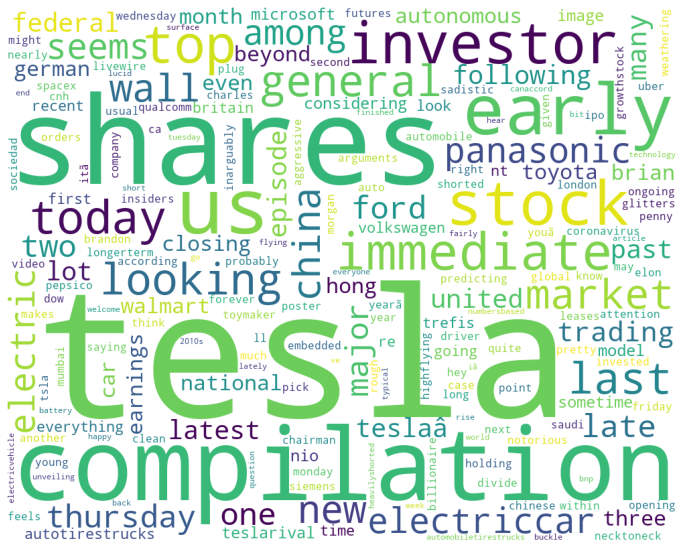

In [51]:
word_cloud(wordcloud_data)

## word2vec (Exploratory, not included in the report)

In [52]:

warnings.filterwarnings(action = 'ignore') 
  
import gensim 
from gensim.models import Word2Vec 
  
#  Reads  file 
s = paragraph_list[0]
stop_words = stopwords.words('english')
# Replaces escape character with space 
f = s.replace("\n", " ") 
  
data = [] 
  
# iterate through each sentence in the file 
for i in sent_tokenize(f): 
    temp = [] 
      
    # tokenize the sentence into words 
    for j in word_tokenize(i): 
        #temp.append(j.lower()) 
        j=j.lower()
        #symbols = "!\"#$%&()*+-./:,;<=>?@[\]^_`{|}~\n'`"
        ##get rid of stop words and symbols 
        #s.translate(None, string.punctuation)
        filtered_temptext = j.translate(str.maketrans('', '', string.punctuation))
        #review_dict_copy[i]=filtered_temptext
        temp.append(filtered_temptext)
    data.append(temp) 
    
# Create Skip Gram model 
model2 = gensim.models.Word2Vec(data, min_count = 1, size = 100, 
                                             window = 5, sg = 1) 
  
# Print results 
print("Cosine similarity between 'tesla' " +
          "and 'good' - Skip Gram : ", 
    model2.similarity('tesla', 'good')) 
      
# print("Cosine similarity between 'alice' " +
#             "and 'machines' - Skip Gram : ", 
#       model2.similarity('alice', 'machines')) 


Cosine similarity between 'tesla' and 'good' - Skip Gram :  0.9993907


In [53]:
model2.most_similar(positive=['tesla'],negative=['stock'])

[('2', 0.05649084225296974),
 ('michael', 0.029592812061309814),
 ('disclosure', 0.02579793706536293),
 ('critical', 0.02451128512620926),
 ('disappear', 0.023333271965384483),
 ('summarizing', 0.023203667253255844),
 ('date', 0.022879965603351593),
 ('accounts', 0.022761356085538864),
 ('daimler', 0.02152874320745468),
 ('hello', 0.021471094340085983)]

In [54]:
model2.most_similar(positive=['tesla'])

[('most', 0.9996460676193237),
 ('things', 0.9996376037597656),
 ('has', 0.9996244311332703),
 ('spiffy', 0.999615490436554),
 ('like', 0.9996144771575928),
 ('actually', 0.9996127486228943),
 ('back', 0.999604344367981),
 ('thinking', 0.9996026754379272),
 ('my', 0.9995982646942139),
 ('would', 0.9995977878570557)]

### Doc2vec

In [55]:
from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from sklearn.model_selection import train_test_split
from nltk.tokenize import sent_tokenize, word_tokenize 
import multiprocessing
cores = multiprocessing.cpu_count()
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")
from sklearn import utils
from sklearn.linear_model import LogisticRegression
import nltk

In [59]:
from nltk.corpus import stopwords
def tokenize_text(text):
    tokens = []
    for sent in nltk.sent_tokenize(text):
        for word in nltk.word_tokenize(sent):
            if len(word) < 2:
                continue
            tokens.append(word.lower())
    return tokens

In [64]:
date_parag_df=pd.DataFrame(date_parag_pair.items())
date_parag_df.rename(columns={0:"Date",1:"paras"},inplace=True)
#date_parag_df=date_parag_df.set_index("Date")
date_parag_df.Date= pd.to_datetime(date_parag_df.Date)
price.Date = pd.to_datetime(price.Date)
##merge 

In [65]:
# date_parag_pair
date_parag_price_df = pd.merge(date_parag_df,
                 price,
                 on='Date',how='right')
len(date_parag_price_df)
date_parag_price_df=date_parag_price_df.fillna("")
date_parag_price_df[date_parag_price_df.isna().any(axis=1)] # to see about null values 

,Date,paras,Open,High,Low,Close,Adj Close,Volume


In [66]:
len(date_parag_price_df)

109

In [67]:
date_parag_price_df=date_parag_price_df.sort_values('Date')
#date_parag_price_df=date_parag_price_df.sort_values('Date')
date_parag_price_df.head()
date_parag_price_df['diff_pct']=date_parag_price_df['Close'].diff(-1)/date_parag_price_df['Close']
date_parag_price_df['Price_lag1']=date_parag_price_df['diff_pct'].shift(-1)
date_parag_price_df['labels'] = date_parag_price_df['Price_lag1'].apply(pct_label)
regres_data.dropna(inplace=True)
date_parag_price_df.head()
#parag_df['label']=np.arange(len(parag_df))
#parag_df.columns={"parag","labels"}
#parag_df.columns={"parag"}
#parag_df.head()

,Date,paras,Open,High,Low,Close,Adj Close,Volume,diff_pct,Price_lag1,labels
76,2019-10-01,Tesla Inc's electric Model 3 remained Norway's...,241.500000,245.949997,239.130005,244.690002,244.690002,6162600,0.006375,0.041542,0
6,2019-10-02,(RTTNews) - Tesla Inc. (TSLA) achieved record ...,243.289993,244.649994,239.429993,243.130005,243.130005,5631400,0.041542,0.006866,0
9,2019-10-03,Major benchmarks staged a big comeback on Thur...,231.860001,234.479996,224.279999,233.029999,233.029999,15084500,0.006866,-0.027179,2
23,2019-10-04,Shares of China’s electric car company Nio (NY...,231.610001,234.779999,228.070007,231.429993,231.429993,7995000,-0.027179,-0.009801,2
0,2019-10-07,PepsiCo (NASDAQ:) is planning to adopt Tesla (...,229.800003,238.559998,228.550003,237.720001,237.720001,8064200,-0.009801,-0.018663,2


In [68]:
documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(common_texts)]
model = Doc2Vec(documents, vector_size=5, window=2, min_count=1, workers=4)

In [69]:
train, test = train_test_split(date_parag_price_df, test_size=0.3, random_state=42)
train_tagged = train.apply(
    lambda r: TaggedDocument(words=tokenize_text(r['paras']), tags=[r.labels]), axis=1)
test_tagged = test.apply(
    lambda r: TaggedDocument(words=tokenize_text(r['paras']), tags=[r.labels]), axis=1)

In [70]:
train_tagged.values[30]

TaggedDocument(words=['shares', 'of', 'tesla', 'nasdaq', 'tsla', 'jumped', 'on', 'thursday', 'rising', 'as', 'much', 'as', '19.7', 'as', 'of', '11:47', 'a.m.', 'edt', 'the', 'stock', 'was', 'up', '16.6', '.the', 'stock', "'s", 'gain', 'follows', 'the', 'company', "'s", 'third-quarter', 'results', 'which', 'featured', 'surprising', 'profit', 'in', 'addition', 'the', 'company', "'s", 'free', 'cash', 'flow', 'was', 'much', 'higher', 'than', 'anticipated.image', 'source', 'getty', 'images.in', 'its', 'third', 'quarter', 'the', 'electric-car', 'company', 'reported', 'non-gaap', 'adjusted', 'earnings', 'per', 'share', 'of', '1.86', '--', 'well', 'ahead', 'of', 'an', 'average', 'analyst', 'estimate', 'for', 'loss', 'per', 'share', 'of', '0.42', 'free', 'cash', 'flow', 'similarly', 'crushed', 'analyst', 'estimates', 'coming', 'in', 'at', '371', 'million', 'on', 'average', 'analysts', 'had', 'expected', 'tesla', 'to', 'report', 'free', 'cash', 'flow', 'of', '32', 'million', 'another', 'quarter'

### DBOW Model

In [74]:
from sklearn.metrics import accuracy_score, f1_score

In [71]:
model_dbow = Doc2Vec(dm=0, vector_size=300, negative=5, hs=0, min_count=2, sample = 0, workers=cores)
model_dbow.build_vocab([x for x in tqdm(train_tagged.values)])

100%|██████████| 76/76 [00:00<00:00, 205258.92it/s]


In [72]:
%%time
for epoch in range(30):
    model_dbow.train(utils.shuffle([x for x in tqdm(train_tagged.values)]), total_examples=len(train_tagged.values), epochs=1)
    model_dbow.alpha -= 0.002
    model_dbow.min_alpha = model_dbow.alpha

100%|██████████| 76/76 [00:00<?, ?it/s]


Wall time: 1.73 s


In [73]:
def vec_for_learning(model, tagged_docs):
    sents = tagged_docs.values
    targets, regressors = zip(*[(doc.tags[0], model.infer_vector(doc.words, steps=20)) for doc in sents])
    return targets, regressors

In [75]:
len(X_train)

85

In [84]:
y_train, X_train = vec_for_learning(model_dbow, train_tagged)
y_test, X_test = vec_for_learning(model_dbow, test_tagged)
logreg = LogisticRegression(n_jobs=1, C=1e5)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Testing accuracy %s' % accuracy_score(y_test, y_pred))
print('Testing F1 score: {}'.format(f1_score(y_test, y_pred, average='weighted')))

Testing accuracy 0.5757575757575758
Testing F1 score: 0.5298438934802571


### DM Model

In [85]:
model_dmm = Doc2Vec(dm=1, dm_mean=1, vector_size=300, window=10, negative=5, min_count=1, workers=5, alpha=0.065, min_alpha=0.065)
model_dmm.build_vocab([x for x in tqdm(train_tagged.values)])

100%|██████████| 76/76 [00:00<00:00, 65001.45it/s]


In [86]:
%%time
for epoch in range(30):
    model_dmm.train(utils.shuffle([x for x in tqdm(train_tagged.values)]), total_examples=len(train_tagged.values), epochs=1)
    model_dmm.alpha -= 0.002
    model_dmm.min_alpha = model_dmm.alpha

100%|██████████| 76/76 [00:00<?, ?it/s]


Wall time: 3.18 s


In [90]:
y_train, X_train = vec_for_learning(model_dmm, train_tagged)
y_test, X_test = vec_for_learning(model_dmm, test_tagged)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Testing accuracy %s' % accuracy_score(y_test, y_pred))
print('Testing F1 score: {}'.format(f1_score(y_test, y_pred, average='weighted')))

Testing accuracy 0.48484848484848486
Testing F1 score: 0.4533956455621082
